In [14]:
# load the data
import os

import pandas as pd

from analysis import load_data
from config import STATS_DIR

stats = []
for f in os.listdir(STATS_DIR):
    if not f.endswith(".json"):
        continue
    basename = os.path.basename(f)
    json_data = load_data(f"{STATS_DIR}{f}")
    if "compile_time" not in json_data:
        json_data["compile_time"] = json_data["total_time"]

    json_data["cnf"] = basename
    stats.append(json_data)

df = pd.DataFrame(stats)

# remove 0 columns
df = df.loc[:, (df != 0).any(axis=0)]

df = df.sort_values("compile_time", ascending=False).reset_index(drop=True)

df

,compile_time,total_time,sat_is_instantiated_var,sat_is_irrelevant_var,sat_var_count,sat_var2pliteral,sat_var2nliteral,sat_is_implied_literal,sat_decide_literal,sat_undo_decide_literal,...,nnf_disjoin,nnf_manager_set_root,nnf_manager_save_to_file,vtree_manager_new,vtree_manager_free,vtree_print_widths,vtree_is_leaf,vtree_is_shannon_node,vtree_shannon_var,cnf
0,27181.396,27237.622,909.777652,0.871674,0.000001,1035.793806,1041.119500,2008.776166,17.224857,6.234273,...,1.341091,0.000008,16.318165,39.813695,0.360784,0.000075,364.458118,1020.566058,914.173560,prob004-log-a.cnf.json
1,13799.684,13808.531,575.099270,4.944061,0.000001,806.343066,808.052035,1448.609777,78.915331,15.380471,...,12.010422,0.000000,8.623953,0.070235,0.661774,0.000022,309.773625,680.321595,573.531495,c1355.isc.cnf.json
2,10030.668,10030.668,72.144848,1.066164,0.000000,560.438095,560.732328,1119.668392,2.524837,1.823033,...,1.890654,0.000001,3.452397,1.312161,0.537111,0.000059,42.997515,113.049358,72.329392,C230_FR.cnf.json
3,7561.005,7576.155,258.965074,2.411103,0.000001,382.108537,384.270887,732.190080,8.061109,5.029485,...,4.407581,0.000001,14.898303,0.097394,0.621486,0.000014,123.251013,278.453718,256.357535,2bitmax_6.cnf.json
4,3424.955,3428.717,26.885675,1.636312,0.000001,272.913739,274.294711,538.360062,6.513439,4.098764,...,4.901688,0.000000,3.591677,0.134315,0.071803,0.000033,14.691126,31.618464,26.778892,s1423.bench.cnf.json
5,3368.799,3372.480,74.018174,2.038496,0.000000,212.665179,213.293149,407.394660,18.568823,4.521849,...,4.086468,0.000000,3.554694,0.035011,0.486802,0.000010,48.925143,100.408529,73.694703,c499.isc.cnf.json
6,3246.482,3248.245,13.010410,0.434538,0.000001,242.570421,242.762318,485.654854,1.008451,0.728904,...,0.667717,0.000000,0.696071,1.011333,0.260221,0.000063,7.268801,21.183028,12.931809,C210_FVF.cnf.json
7,3143.464,3146.635,24.667613,0.322847,0.000001,205.974156,206.447235,412.674388,1.048727,0.672823,...,0.480843,0.000001,0.352278,2.785485,0.090460,0.000061,14.517318,36.879054,24.513931,C163_FW.cnf.json
8,2978.480,2979.280,3.757560,1.645974,0.000000,158.436662,159.462530,312.111351,608.095223,9.731106,...,0.000071,0.000001,0.001964,0.778555,0.020763,0.000011,2.084353,3.170077,3.815652,uf250-026.cnf.json
9,2285.410,2289.285,8.241880,0.430545,0.000001,173.596082,173.976708,346.832008,0.718289,0.520940,...,0.270667,0.000000,0.107317,3.724139,0.070955,0.000066,4.403991,11.578756,8.258548,C638_FKA.cnf.json


In [21]:
total_df = pd.DataFrame()
total_df["cnf"] = df["cnf"]
total_df["total_time"] = df["total_time"]
total_df["compile_time"] = df["compile_time"]
total_df["sat_total"] = df.filter(like="sat_").sum(axis=1)
total_df["vtree_total"] = df.filter(like="vtree_").sum(axis=1)
total_df["nnf_total"] = df.filter(like="nnf_").sum(axis=1)

total_df["vtree_manager_new"] = df["vtree_manager_new"]
total_df["sat_state_new"] = df["sat_state_new"]

total_df["diff_time"] = total_df["total_time"] - total_df["compile_time"]

total_df

,cnf,total_time,compile_time,sat_total,vtree_total,nnf_total,vtree_manager_new,sat_state_new,diff_time
0,prob004-log-a.cnf.json,27237.622,27181.396,10378.445858,2339.372290,797.127671,39.813695,0.015251,56.226
1,c1355.isc.cnf.json,13808.531,13799.684,4748.589945,1564.358746,635.282442,0.070235,0.002074,8.847
2,C230_FR.cnf.json,10030.668,10030.668,4642.894797,230.225596,92.333531,1.312161,0.005847,0.000
3,2bitmax_6.cnf.json,7576.155,7561.005,2849.119039,658.781160,281.846769,0.097394,0.001042,15.150
4,s1423.bench.cnf.json,3428.717,3424.955,1589.354578,73.294633,52.071925,0.134315,0.002370,3.762
5,c499.isc.cnf.json,3372.480,3368.799,1366.175689,223.550198,99.248130,0.035011,0.001083,3.681
6,C210_FVF.cnf.json,3248.245,3246.482,1551.027360,42.655255,15.879128,1.011333,0.004889,1.763
7,C163_FW.cnf.json,3146.635,3143.464,1452.992833,78.786309,27.340641,2.785485,0.006997,3.171
8,uf250-026.cnf.json,2979.280,2978.480,2046.247480,9.869411,0.014308,0.778555,0.001601,0.800
9,C638_FKA.cnf.json,2289.285,2285.410,1094.823099,28.036455,8.417565,3.724139,0.008870,3.875


In [22]:
# sat as a percent of compile time
total_df["sat_percent"] = total_df["sat_total"] / total_df["compile_time"]

total_df

,cnf,total_time,compile_time,sat_total,vtree_total,nnf_total,vtree_manager_new,sat_state_new,diff_time,sat_percent
0,prob004-log-a.cnf.json,27237.622,27181.396,10378.445858,2339.372290,797.127671,39.813695,0.015251,56.226,0.381822
1,c1355.isc.cnf.json,13808.531,13799.684,4748.589945,1564.358746,635.282442,0.070235,0.002074,8.847,0.344109
2,C230_FR.cnf.json,10030.668,10030.668,4642.894797,230.225596,92.333531,1.312161,0.005847,0.000,0.462870
3,2bitmax_6.cnf.json,7576.155,7561.005,2849.119039,658.781160,281.846769,0.097394,0.001042,15.150,0.376818
4,s1423.bench.cnf.json,3428.717,3424.955,1589.354578,73.294633,52.071925,0.134315,0.002370,3.762,0.464051
5,c499.isc.cnf.json,3372.480,3368.799,1366.175689,223.550198,99.248130,0.035011,0.001083,3.681,0.405538
6,C210_FVF.cnf.json,3248.245,3246.482,1551.027360,42.655255,15.879128,1.011333,0.004889,1.763,0.477756
7,C163_FW.cnf.json,3146.635,3143.464,1452.992833,78.786309,27.340641,2.785485,0.006997,3.171,0.462227
8,uf250-026.cnf.json,2979.280,2978.480,2046.247480,9.869411,0.014308,0.778555,0.001601,0.800,0.687011
9,C638_FKA.cnf.json,2289.285,2285.410,1094.823099,28.036455,8.417565,3.724139,0.008870,3.875,0.479049


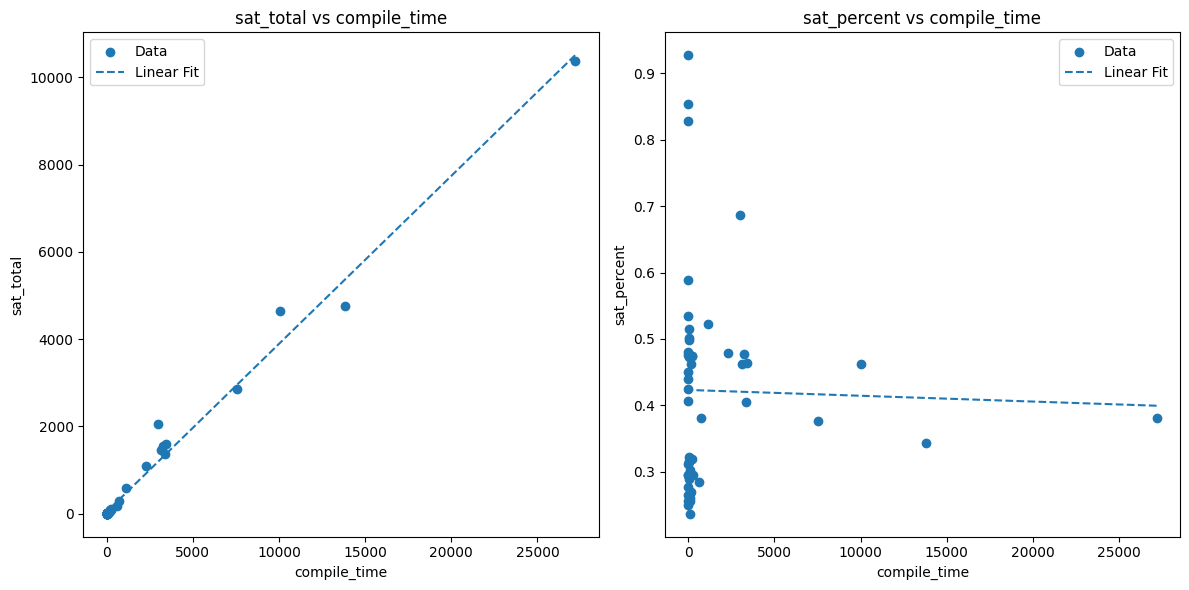

In [32]:
# plot compile time vs sat time

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

degree = 1
coefficients_total = np.polyfit(total_df['compile_time'], total_df['sat_total'], degree)
poly_total = np.poly1d(coefficients_total)

axes[0].scatter(total_df['compile_time'], total_df['sat_total'], marker='o', linestyle='-', label='Data')
axes[0].plot(total_df['compile_time'], poly_total(total_df['compile_time']), linestyle='--', label='Linear Fit')
axes[0].set_title('sat_total vs compile_time')
axes[0].set_xlabel('compile_time')
axes[0].set_ylabel('sat_total')
axes[0].legend()

coefficients_percent = np.polyfit(total_df['compile_time'], total_df['sat_percent'], degree)
poly_percent = np.poly1d(coefficients_percent)

axes[1].scatter(total_df['compile_time'], total_df['sat_percent'], marker='o', linestyle='-', label='Data')
axes[1].plot(total_df['compile_time'], poly_percent(total_df['compile_time']), linestyle='--', label='Linear Fit')
axes[1].set_title('sat_percent vs compile_time')
axes[1].set_xlabel('compile_time')
axes[1].set_ylabel('sat_percent')
axes[1].legend()

plt.tight_layout()

plt.show()

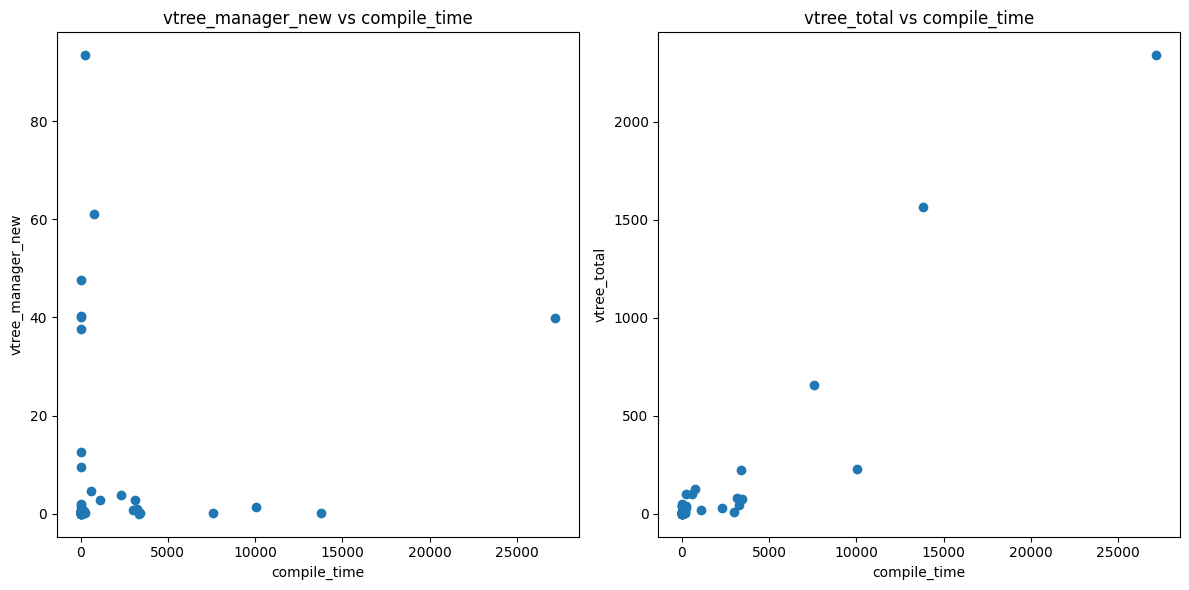

In [ ]:
# plot vtree manager new vs compile time

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].scatter(total_df['compile_time'], total_df['vtree_manager_new'], marker='o', linestyle='-')
axes[0].set_title('vtree_manager_new vs compile_time')
axes[0].set_xlabel('compile_time')
axes[0].set_ylabel('vtree_manager_new')

axes[1].scatter(total_df['compile_time'], total_df['vtree_total'], marker='o', linestyle='-')
axes[1].set_title('vtree_total vs compile_time')
axes[1].set_xlabel('compile_time')
axes[1].set_ylabel('vtree_total')

plt.tight_layout()

plt.show()